## Euler Rotations

In this notebook we explore Euler rotations and get a feel for why the order of rotations matters.

Euler rotations are defined counterclockwise about the axes of the vehicle body frame, where:

- *Roll* - $\phi$ is about the x-axis
- *Pitch* - $\theta$ is about the y-axis
- *Yaw* - $\psi$ is about the z-axis

As we will see, the same set of rotation transformations, but applied in a different order, can produce a very different final result!

In [1]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from enum import Enum

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

plt.rcParams["figure.figsize"] = [12, 12]

In [25]:
class Rotation(Enum):
    ROLL = 0
    PITCH = 1
    YAW = 2  

class EulerRotation:
    
    def __init__(self, rotations):
        """
        `rotations` is a list of 2-element tuples where the
        first element is the rotation kind and the second element
        is angle in degrees.
        
        Ex:
        
            [(Rotation.ROLL, 45), (Rotation.YAW, 32), (Rotation.PITCH, 55)]
            
        """
        self._rotations = rotations
        self._rotation_map = {Rotation.ROLL : self.roll, Rotation.PITCH : self.pitch, Rotation.YAW : self.yaw}

    def roll(self, phi):
        """Returns a rotation matrix along the roll axis"""
        cos = np.cos(phi)
        sin = np.sin(phi)
        roll = np.array([[1, 0, 0], [0, cos, -sin], [0, sin, cos]])
        return roll
    
    def pitch(self, theta):
        """Returns the rotation matrix along the pitch axis"""
        cos = np.cos(theta)
        sin = np.sin(theta)
        pitch = np.array([[cos, 0, sin], [0, 1, 0], [-sin, 0, cos]])
        return pitch

    def yaw(self, psi):
        """Returns the rotation matrix along the yaw axis"""
        cos = np.cos(psi)
        sin = np.sin(psi)
        yaw = np.array([[cos, -sin, 0], [sin, cos, 0], [0, 0, 1]])
        return yaw

    def rotate(self):
        """Applies the rotations in sequential order"""
        R = np.eye(3)      # Rotation Matirx = unitary diagonal matrix
        for rotation in self._rotations:
            rot_kind = rotation[0]
            rot_angle = np.deg2rad(rotation[1])    # From degrees to radians 
            R = np.matmul(self._rotation_map[rot_kind](rot_angle), R) 
        return R

Below we form a sequence of rotations. The rotation matrix `R` is the mapping of performing the rotations in sequential order. Multiplying a vector by `R` will perform the rotations on that vector.

In [67]:
# Test the code by passing in some rotation values
rotations = [
    (Rotation.ROLL, 25),
    (Rotation.PITCH, 75),
    (Rotation.YAW, 90)]

R = EulerRotation(rotations).rotate()
print('Rotation matrix ...')
print(R)

# Should print
# Rotation matrix ...
# [[ 0.    -0.906  0.423]
#  [ 0.259  0.408  0.875]
#  [-0.966  0.109  0.235]]

Rotation matrix ...
[[ 0.    -0.906  0.423]
 [ 0.259  0.408  0.875]
 [-0.966  0.109  0.235]]


### Same Rotations, Different Order

In order to show how order matters, now we are going to calculate three different rotations matrices that stem from the same set of Euler rotations but in differing order.

In [104]:
# Rotation 1
rotation_1 = [rotations[0], rotations[2], rotations[1]]
R_1 = EulerRotation(rotation_1).rotate()
print('Rotation 1')
print(R_1)

# Rotation 2
rotation_2 = [rotations[2], rotations[0], rotations[1]]
R_2 = EulerRotation(rotation_2).rotate()
print('Rotation 2')
print(R_2)

# Rotation 3
rotation_3 = [rotations[1], rotations[2], rotations[0]]
R_3 = EulerRotation(rotation_3).rotate()
print('Rotation 3')
print(R_3)

Rotation 1
[[ 0.    -0.707  0.707]
 [ 1.     0.     0.   ]
 [-0.     0.707  0.707]]
Rotation 2
[[ 0.    -0.707  0.707]
 [ 1.     0.     0.   ]
 [-0.     0.707  0.707]]
Rotation 3
[[ 0.    -1.     0.   ]
 [ 0.707  0.     0.707]
 [-0.707  0.     0.707]]


### Seeing is Believing
It's clear the three rotation matrices are different, but, in order to get an deeper understanding, let's plot the impact of the rotations over the same vector `v`. Feel free to change this input vector.

In [101]:
# Unit vector along x-axis
v = np.array([1, 0, 0])

# Calculation of rotated versions of `v`.
rv1 = np.matmul(R_1, v)
rv2 = np.matmul(R_2, v)
rv3 = np.matmul(R_3, v)

Now plot and check how order matters.

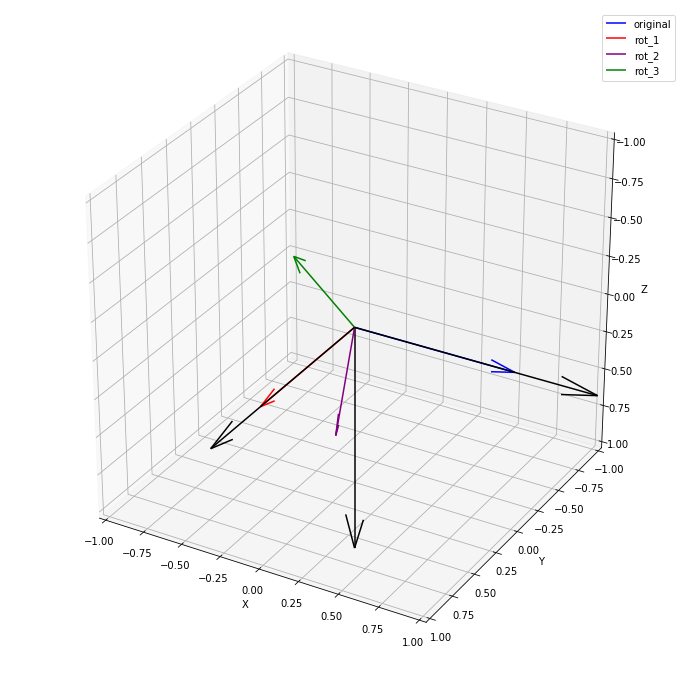

In [102]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# axes (shown in black)
ax.quiver(0, 0, 0, 1.5, 0, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 1.5, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 0, 1.5, color='black', arrow_length_ratio=0.15)


# Original Vector (shown in blue)
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', arrow_length_ratio=0.15, label='original')

# Rotated Vectors (shown in red)
ax.quiver(0, 0, 0, rv1[0], rv1[1], rv1[2], color='red', arrow_length_ratio=0.15, label='rot_1')
ax.quiver(0, 0, 0, rv2[0], rv2[1], rv2[2], color='purple', arrow_length_ratio=0.15, label='rot_2')
ax.quiver(0, 0, 0, rv3[0], rv3[1], rv3[2], color='green', arrow_length_ratio=0.15, label='rot_3')

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(1, -1)
ax.set_zlim3d(1, -1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.legend()

plt.show()